<a href="https://colab.research.google.com/github/Je-97/Analysis-Dataset/blob/main/Project_DS242.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt

In [4]:
class Transaction:
    def __init__(self, type, amount, category, date, account):
        self.type = type
        self.amount = amount
        self.category = category
        self.date = date
        self.account = account

transactions = []
categories = ["Salary", "Rent", "Groceries", "Utilities"]
account_types = ["Checking", "Savings", "Credit Card"]

while True:
    type = input("Please enter the transaction type (Income/Expense): ")
    amount = float(input("Please enter the amount: "))

    print("Please select a category or add a new one:")
    for i, category in enumerate(categories):
        print(f"{i+1}. {category}")
    category_choice = int(input("Selection: "))
    category = categories[category_choice-1]

    date = input("Please enter the date (YYYY-MM-DD): ")

    print("Please enter the account type:")
    for i, account_type in enumerate(account_types):
        print(f"{i+1}. {account_type}")
    account_choice = int(input("Selection: "))
    account = account_types[account_choice-1]

    transaction = Transaction(type, amount, category, date, account)
    transactions.append(transaction)

    continue_prompt = input("Do you want to continue? (yes/no): ")
    if continue_prompt.lower() != "yes":
        break

for transaction in transactions:
    print(f"Type: {transaction.type}, Amount: {transaction.amount}, Category: {transaction.category}, Date: {transaction.date}, Account: {transaction.account}")


Please enter the transaction type (Income/Expense): Expense
Please enter the amount: 9000
Please select a category or add a new one:
1. Salary
2. Rent
3. Groceries
4. Utilities
Selection: 1
Please enter the date (YYYY-MM-DD): 2023-10-10
Please enter the account type:
1. Checking
2. Savings
3. Credit Card
Selection: 3
Do you want to continue? (yes/no): no
Type: Expense, Amount: 9000.0, Category: Salary, Date: 2023-10-10, Account: Credit Card


In [3]:
class PersonalFinanceManager:
    def __init__(self):
        self.accounts = {}

    def add_account(self, name, balance=0):
        self.accounts[name] = balance

    def add_transaction(self, account, date, type, category, description, amount):
        if account not in self.accounts:
            self.add_account(account)
        if type == "Expense":
            self.accounts[account] -= amount
        else:
            self.accounts[account] += amount

    def import_transactions(self, file_path):
        with open('transactions.csv', 'r') as file:
            reader = csv.reader(file)
            next(reader)
            for row in reader:
                date, type, category, description, amount_str, account = row
                try:
                    amount = float(amount_str)
                except ValueError:
                    print(f"Skipping invalid amount: {amount_str}")
                    continue
                self.add_transaction(account, date, type, category, description, amount)

    def view_all_accounts_balance_summary(self):
        for account, balance in self.accounts.items():
            print(f"{account}: {balance}")


pf_manager = PersonalFinanceManager()


pf_manager.import_transactions('transactions.csv')


while True:
    print("\nMain Menu:")
    print("1. Add a transaction")
    print("2. Import Transaction Data File")
    print("3. View All Accounts Balance Summary")
    print("4. Back to Main Menu")
    option = input("Select an option: ")
    if option == "1":
        account = input("Enter the account name: ")
        date = input("Enter the date (YYYY-MM-DD): ")
        type = input("Enter the type of transaction (Income or Expense): ")
        category = input("Enter the category: ")
        description = input("Enter the description: ")
        amount = float(input("Enter the amount: "))
        pf_manager.add_transaction(account, date, type, category, description, amount)
        print("Transaction added successfully.")
    elif option == "2":
        file_path = input("Enter the file path: ")
        pf_manager.import_transactions(file_path)
        print("All transactions imported and added to the accounts successfully.")
    elif option == "3":
        pf_manager.view_all_accounts_balance_summary()
    elif option == "4":
        break


Skipping invalid amount: 2456.10$
Skipping invalid amount: 594.86$
Skipping invalid amount: 110.24$
Skipping invalid amount: 43.32$
Skipping invalid amount: 2004.54$
Skipping invalid amount: 489.07$
Skipping invalid amount: 148.63$
Skipping invalid amount: 2305.34$
Skipping invalid amount: 394.72$
Skipping invalid amount: 49.68$
Skipping invalid amount: 2421.34$
Skipping invalid amount: 533.25$
Skipping invalid amount: 136.13$
Skipping invalid amount: 84.02$
Skipping invalid amount: 2271.26$
Skipping invalid amount: 497.60$
Skipping invalid amount: 803.62$
Skipping invalid amount: 2167.82$
Skipping invalid amount: 496.95$
Skipping invalid amount: 1932.93$
Skipping invalid amount: 521.22$
Skipping invalid amount: 722.75$
Skipping invalid amount: 58.15$
Skipping invalid amount: 1977.83$
Skipping invalid amount: 441.31$
Skipping invalid amount: 919.79$
Skipping invalid amount: 2540.13$
Skipping invalid amount: 579.72$
Skipping invalid amount: 160.18$
Skipping invalid amount: 826.47$
Skipp

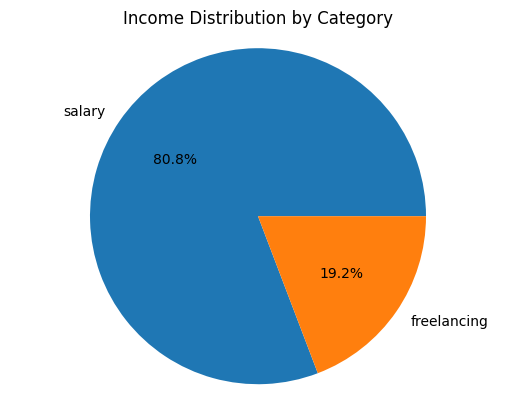

In [27]:
def read_transactions(file_name):
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        transactions = list(reader)
    return transactions

def filter_by_date(transactions, start_date, end_date):
    start_date = datetime.strptime(start_date, '%d/%m/%Y')
    end_date = datetime.strptime(end_date, '%d/%m/%Y')

    filtered_transactions = []
    for transaction in transactions:
        try:
            transaction_date = datetime.strptime(transaction['Date/time'], '%d-%m-%Y')
        except ValueError:
            transaction_date = datetime.strptime(transaction['Date/time'], '%d/%m/%Y')
        if start_date <= transaction_date <= end_date:
            filtered_transactions.append(transaction)

    return filtered_transactions

def get_income_by_category(transactions):
    income_by_category = {}
    for transaction in transactions:
        if transaction['Type of Transfer'] == 'Income':
            category = transaction['Category']
            amount = float(transaction['Amount'].replace('$', ''))
            income_by_category[category] = income_by_category.get(category, 0) + amount
    return income_by_category

def visualize_income_distribution_by_category(income_by_category):
    categories = list(income_by_category.keys())
    amounts = list(income_by_category.values())

    plt.pie(amounts, labels=categories, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Income Distribution by Category')
    plt.show()

# Example usage
start_date = '01/01/2021'
end_date = '31/12/2023'
file_name = r'transactions.csv'

transactions = read_transactions(file_name)
filtered_transactions = filter_by_date(transactions, start_date, end_date)
income_by_category = get_income_by_category(filtered_transactions)
visualize_income_distribution_by_category(income_by_category)




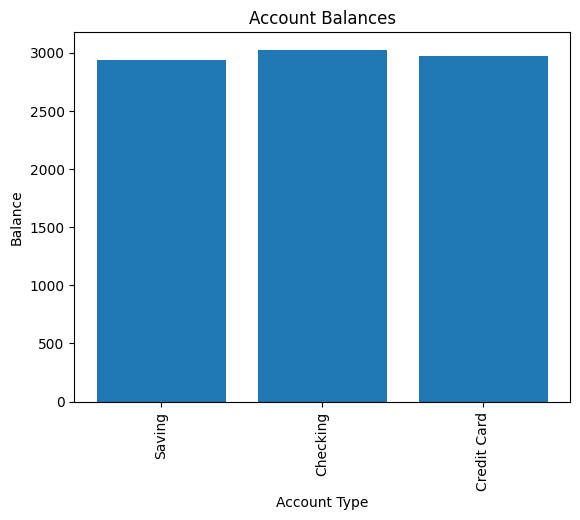

In [25]:
def plot_account_balances(file_path):
    data = pd.read_csv(file_path)

    account_types = data['Account Type']
    balances = data['Amount'].str.replace('$', '').astype(float)

    plt.bar(account_types, balances)
    plt.title('Account Balances')
    plt.xlabel('Account Type')
    plt.ylabel('Balance')
    plt.xticks(rotation=90)
    plt.show()
plot_account_balances('transactions.csv')



In [ ]:

class PersonalFinanceManager:
    def __init__(self):
        self.accounts = {}

    def add_account(self, account_name):
        if account_name not in self.accounts:
            self.accounts[account_name] = {"balance": 0, "transactions": []}

    def add_transaction(self, account_name, transaction):
        self.add_account(account_name)
        self.accounts[account_name]["transactions"].append(transaction)
        if transaction["Type of Transfer"] == "Expense":
            self.accounts[account_name]["balance"] -= transaction["Amount"]
        else:
            self.accounts[account_name]["balance"] += transaction["Amount"]

    def get_balance(self, account_name):
        return self.accounts[account_name]["balance"]

    def filter_by_date(self, account_name, start_date, end_date):
     start_date = datetime.strptime(start_date, "%Y-%m-%d")
     end_date = datetime.strptime(end_date, "%Y-%m-%d")
     return [t for t in self.accounts[account_name]["transactions"] if start_date <= datetime.strptime(t["date"], "%Y-%m-%d") <= end_date]


    def filter_by_category(self, account_name, category):
        return [t for t in self.accounts[account_name]["transactions"] if t["category"] == category]

    def filter_by_account_type(self):
        account_type = input("Enter the account type: ")
        for account_name, account_info in self.accounts.items():
            if account_info["type"] == account_type:
                print(f"Account Name: {account_name}")
                for transaction in account_info["transactions"]:
                    print(transaction)


pf_manager = PersonalFinanceManager()

with open('transactions.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        date_time, type_of_transfer, category, details, amount, account_type = row
        transaction = {"date": date_time, "Type of Transfer": type_of_transfer, "category": category, "details": details, "Amount": float(amount.replace('$', ''))}
        pf_manager.add_transaction(account_type, transaction)

while True:
    print("\nMain Menu:")
    print("1. Filter by Category")
    print("2. Filter by Date")
    print("3. Filter by Account Type")
    print("0. Back to Main Menu")
    option = input("Select an option: ")
    if option == "1":
        account_name = input("Enter the account name: ")
        category = input("Enter the desired category: ")
        transactions = pf_manager.filter_by_category(account_name, category)
        print("Filtered transactions:")
        for transaction in transactions:
            print(transaction)
    elif option == "2":
        account_name = input("Enter the account name: ")
        start_date = input("Enter the start date (YYYY-MM-DD): ")
        end_date = input("Enter the end date (YYYY-MM-DD): ")
        transactions = pf_manager.filter_by_date(account_name, start_date, end_date)
        print("Filtered transactions:")
        for transaction in transactions:
            print(transaction)
    elif option == "3":
        pf_manager.filter_by_account_type()
    elif option == "0":
        break



Main Menu:
1. Filter by Category
2. Filter by Date
3. Filter by Account Type
0. Back to Main Menu
Select an option: 1
Enter the account name: Checking
Enter the desired category: salary
Filtered transactions:
{'date': '2/1/2021', 'Type of Transfer': 'Income', 'category': 'salary', 'details': 'Monthly Salary', 'Amount': 2004.54}
{'date': '10/1/2021', 'Type of Transfer': 'Income', 'category': 'salary', 'details': 'Monthly Salary', 'Amount': 2389.06}
{'date': '15-01-2021', 'Type of Transfer': 'Income', 'category': 'salary', 'details': 'Monthly Salary', 'Amount': 2583.76}
{'date': '17-01-2021', 'Type of Transfer': 'Income', 'category': 'salary', 'details': 'Monthly Salary', 'Amount': 1936.23}
{'date': '20-01-2021', 'Type of Transfer': 'Income', 'category': 'salary', 'details': 'Monthly Salary', 'Amount': 2028.78}
{'date': '23-01-2021', 'Type of Transfer': 'Income', 'category': 'salary', 'details': 'Monthly Salary', 'Amount': 2350.47}
{'date': '25-01-2021', 'Type of Transfer': 'Income', 'c